In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use("ggplot")
#pd.set_option("max_column")

In [52]:
#r-raw data, to escape spaces we should encrypt with r or double backspaces or forward slash.
file_path = r"/Users/ruchithareddy/Documents/Data Analysiis Project/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)

#can also import files directly instead of storing it in a variable
#Double escape backslashes in the path to remove the spaces.
#df = pd.read_csv("//Users//ruchithareddy//Documents//Data Analysiis Project//Fitabase Data 4.12.16-5.12.16//dailyActivity_merged.csv")
#df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [54]:
df.shape


(940, 15)

In [56]:
df.columns


Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [58]:
df.dtypes

#ID-int64, but it actually has to be str because in int64 or int we require oly if we r doing any calculations, since in ID we wont be performing any calculations we can use it as str as well.
#ActivityDate-object, it should be date 

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [60]:
#data cleaning
#format="%Y" capital Y is must.
#str=object
df["Id"] = df["Id"].astype(str) 
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [62]:
#to check single column data type
df.dtypes['ActivityDate']
df.dtypes['Id']

dtype('O')

In [64]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [66]:
#TotalDistance and TrackerDistance columns have the same values, so we can delete one, but bfr that we need to confirm if all the rows have the same values
#LoggedActivitiesDistance and SedentaryActiveDistance have 0 values, should we keep it or delete it.
df['diff'] = df['TotalDistance'] - df['TrackerDistance']
df['diff']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
935    0.0
936    0.0
937    0.0
938    0.0
939    0.0
Name: diff, Length: 940, dtype: float64

In [68]:
#more clear review use count function
df['diff'].value_counts()

diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [70]:
#to check what are the rows with more than 0 value
df.query('diff > 0.0')

#at this point we found that there is some values in LoggedActivitiesDistance and SedentaryActiveDistance therefore we cannot delete those columns


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [72]:
#if we want the column header to be in lower case
#df.columns = df.columns.str.lower()
#df.columns

In [81]:
#to seperate the column header with underscore
df.rename(columns = {'ActivityDate':'Activity_Date', 'TotalSteps':'Total_Steps', 'TotalDistance':'Total_Distance', 'TrackerDistance':'Tracker_Distance',
       'LoggedActivitiesDistance':'Logged_Activities_Distance', 'VeryActiveDistance':'Very_Active_Distance',
       'ModeratelyActiveDistance':'Moderately_Active_Distance', 'LightActiveDistance':'Light_Active_Distance',
       'SedentaryActiveDistance':'Sedentary_Active_Distance', 'VeryActiveMinutes':'Very_Active_Minutes', 'FairlyActiveMinutes':'Fairly_Active_Minutes',
       'LightlyActiveMinutes':'Lightly_Active_Minutes', 'SedentaryMinutes':'Sedentary_Minutes'},inplace = True)
df.head()

,Id,Activity_Date,Total_Steps,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,diff
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0


In [210]:
#to add new column
Day_of_week = df['Activity_Date'].dt.day_name()
df['Day_of_week'] = Day_of_week

df['n_day_of_week'] = df['Activity_Date'].dt.weekday #0-monday 6-sunday

In [212]:
df.head()

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Activity_level,Day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Very Active,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Very Active,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Very Active,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Very Active,Friday,4
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Very Active,Saturday,5


In [108]:
df.columns

Index(['Id', 'Activity_Date', 'Total_Steps', 'Total_Distance',
       'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Calories', 'diff',
       'Day_of_week', 'n_day_of_week'],
      dtype='object')

In [96]:
#check null values
#df.isnull()

#more clear way
df.isnull().sum()

Id                            0
Activity_Date                 0
Total_Steps                   0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Calories                      0
diff                          0
Day_of_week                   0
n_day_of_week                 0
dtype: int64

In [102]:
#check duplicates
#df.duplicated()

#more consice way
df.duplicated().sum()

#duplicated is not telling by considering columns it is telling by considering the rows
#for ex. weekday column is repeated but it is not showing as duplicated, because it is not considering oly the columns.

0

In [122]:
#to know whether the total_distance column is having the values in kms mts
#with the help of total_steps we will cal it
#dont do the changes in the original data , instead take the copy of the dataset and thn do the changes.
#take oly the columns need(normalization) to save the storage
df = df[['Id', 'Activity_Date', 'Total_Steps', 'Total_Distance',
       #'Tracker_Distance', 'Logged_Activities_Distance',
       #'Very_Active_Distance', 'Moderately_Active_Distance',
       #'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes','Calories' ]].copy()

In [126]:
df

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories
0,1503960366,2016-04-12,13162,8.500000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,88,12,213,1127,3832


In [128]:
df.head(10)

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775


In [136]:
#Analysis
#write down the categories on whc we will be analysing

#category1
#sedentary(not active)-less than 6000 steps on average
#active-between 6000 and 12000 steps on average
#very active-more than 12000 steps on average

df['Id'].unique()

array(['1503960366', '1624580081', '1644430081', '1844505072',
       '1927972279', '2022484408', '2026352035', '2320127002',
       '2347167796', '2873212765', '3372868164', '3977333714',
       '4020332650', '4057192912', '4319703577', '4388161847',
       '4445114986', '4558609924', '4702921684', '5553957443',
       '5577150313', '6117666160', '6290855005', '6775888955',
       '6962181067', '7007744171', '7086361926', '8053475328',
       '8253242879', '8378563200', '8583815059', '8792009665',
       '8877689391'], dtype=object)

In [138]:
#group the ids
#same ids have multiple entries
#because same persons may be using the watch on different days and those activities were tracked
#to check the count of each id
df['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [158]:
#group the ids
id_grps = df.groupby(['Id'])
id_avg_steps = id_grps['Total_Steps'].mean().sort_values(ascending=False)
id_avg_steps = id_avg_steps.to_frame()
id_avg_steps

,Total_Steps
Id,
8877689391,16040.032258
8053475328,14763.290323
1503960366,12116.741935
2022484408,11370.645161
7007744171,11323.423077
3977333714,10984.566667
4388161847,10813.935484
6962181067,9794.806452
2347167796,9519.666667


In [160]:
#to group them based on catogory1
conditions = [
    (id_avg_steps <= 6000),
    (id_avg_steps > 6000) & (id_avg_steps < 12000),
    (id_avg_steps >= 12000)
]
values = ['Sedentary','Active','Very Active']

#create a new column
id_avg_steps['Activity_level'] = np.select(condition,values)

#store it in a variable
id_activity_level = id_avg_steps['Activity_level'] 
id_avg_steps


,Total_Steps,Activity_level
Id,,
8877689391,16040.032258,Very Active
8053475328,14763.290323,Very Active
1503960366,12116.741935,Very Active
2022484408,11370.645161,Active
7007744171,11323.423077,Active
3977333714,10984.566667,Active
4388161847,10813.935484,Active
6962181067,9794.806452,Active
2347167796,9519.666667,Active


In [170]:
#we want this column in our main dataset also
#for every users entry we want to know whether it is active or very active or not active
#suppose user ....066 is having 12908 steps in one entry then activity_level should show = very active
#and the same user is having 2390 steps on the other day thn the activity_level should still show = very active 
#the analysis is based on the user and not on the daily activity
#using list comprehension we will type the code here
df['Activity_level'] = [id_activity_level for i in df['Id']]
df.head()

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Id 8877689391 Very Active 8053475328 Ver...
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Id 8877689391 Very Active 8053475328 Ver...
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Id 8877689391 Very Active 8053475328 Ver...
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Id 8877689391 Very Active 8053475328 Ver...
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Id 8877689391 Very Active 8053475328 Ver...


In [172]:
#make the last column clean
df['Activity_level'] = [id_activity_level[i] for i in df['Id']]
df.head(10)

,Id,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories,Activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Very Active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Very Active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Very Active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Very Active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Very Active
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,Very Active
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,Very Active
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,Very Active
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,Very Active
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,Very Active


In [174]:
#to know the number of unique values for any column
df['Id'].nunique()

33

In [176]:
df['Activity_Date'].nunique()

31

In [182]:
#to check how many days each id hv appeared
df['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [184]:
#start by describing the data
#dscribing = summarize(max,min std etc)
df.describe()

,Activity_Date,Total_Steps,Total_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862


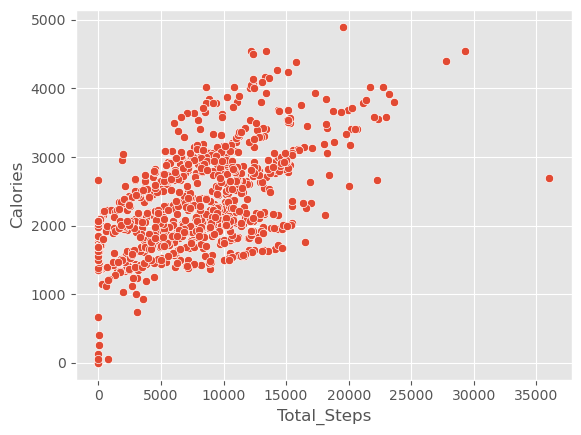

In [196]:
#ploting graphs
#show the correlation between steps and calories burnt

ax = sns.scatterplot(x='Total_Steps' , y='Calories', data=df)

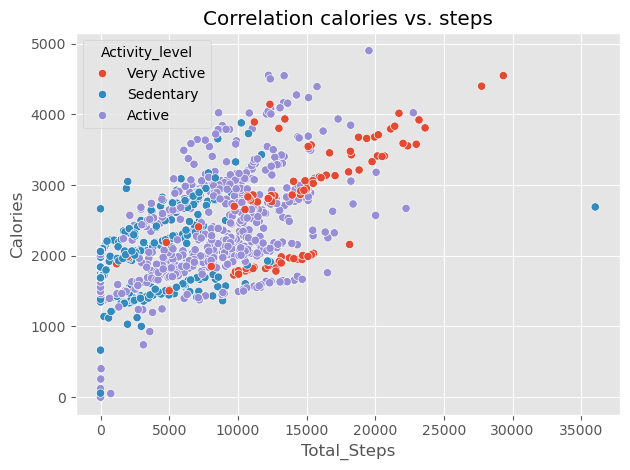

In [206]:
#giving colour based on the activity level and title for the graph
ax = sns.scatterplot(x='Total_Steps' , y='Calories', data=df, hue=df['Activity_level'])
    
plt.title('Correlation calories vs. steps')

plt.tight_layout()
plt.show()

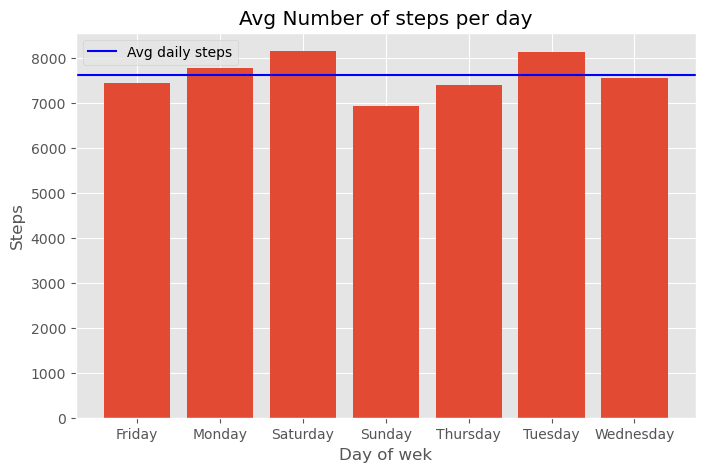

In [235]:
#average steps per day
fig, ax =plt.subplots(1,1,figsize=(8,5 ))
day_grp = df.groupby(['Day_of_week'])
avg_daily_steps = day_grp['Total_Steps'].mean()
avg_steps = df['Total_Steps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)


#order the days
#findout
#weekdays_names = ['Mondays'
#ax.set,xtricks[range(len)]

#to draw an average line with colour
ax.axhline(y=avg_daily_steps.mean(), color='blue', label='Avg daily steps')

ax.set_ylabel('Steps')
ax.set_xlabel('Day of wek')
ax.set_title('Avg Number of steps per day')
plt.legend()
plt.show()

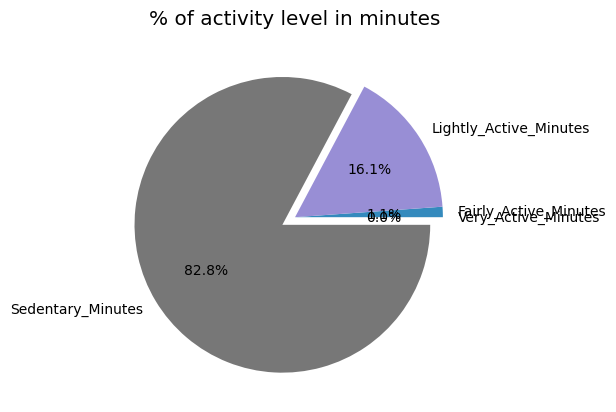

In [253]:
#percentage of activity in minutes
Very_Active_Minutes=df['Very_Active_Minutes'].mean()			
Fairly_Active_Minutes=df['Fairly_Active_Minutes']	.sum()
Lightly_Active_Minutes=df['Lightly_Active_Minutes'].sum()
Sedentary_Minutes=df['Sedentary_Minutes'].sum()

slices = [Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes]
labels = ['Very_Active_Minutes','Fairly_Active_Minutes','Lightly_Active_Minutes','Sedentary_Minutes']
explode = [0,0,0,0.1]
plt.pie(slices,labels=labels,explode=explode, autopct = '%1.1f%%')

#for percentage display = autopct = '%1.1f%%'

plt.title('% of activity level in minutes')
plt.show()
 

Text(0.5, 0.98, 'correlation between activity level in minutes and colories')

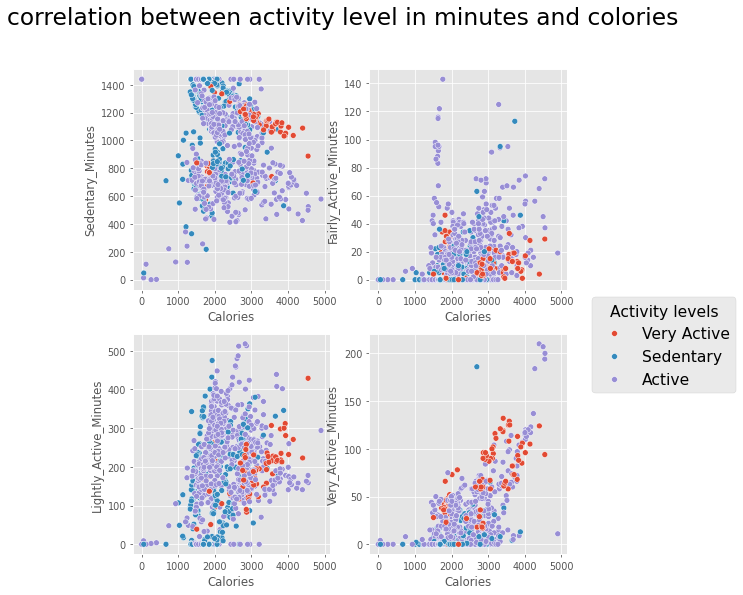

In [299]:
#correlation between activity level in minutes and colories
n_day_of_weeks = [0,1,2,3,4,5,6]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,9),dpi=70)
sns.scatterplot(data=df,x='Calories', y='Sedentary_Minutes',hue='Activity_level',ax=axes[0,0],legend=False)
sns.scatterplot(data=df,x='Calories', y='Fairly_Active_Minutes',hue='Activity_level',ax=axes[0,1],legend=False)
sns.scatterplot(data=df,x='Calories', y='Lightly_Active_Minutes',hue='Activity_level',ax=axes[1,0],legend=False)
sns.scatterplot(data=df,x='Calories', y='Very_Active_Minutes',hue='Activity_level',ax=axes[1,1],legend=True)
plt.legend(title = 'Activity levels',fontsize=16,bbox_to_anchor = (1.9,1.2),title_fontsize=16)
fig.suptitle('correlation between activity level in minutes and colories',fontsize=24)

In [ ]:

#category2
#low use-less than 8hrs per day on average
#normal use-between 8hrs and 16hrs per day on average
#high use-more than 16hrs per day on average